In [70]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/breast-cancer-wisconsin-data.csv')
print(myData.shape)

(569, 33)


In [71]:
myData = myData.drop(columns=['Unnamed: 32'])
myData = myData.drop(columns=['id'])
peek = myData.head(10)
print(peek)

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         M        17.99         10.38          122.80     1001.0            0.118   
1         M        20.57         17.77          132.90     1326.0            0.085   
2         M        19.69         21.25          130.00     1203.0            0.110   
3         M        11.42         20.38           77.58      386.1            0.142   
4         M        20.29         14.34          135.10     1297.0            0.100   
5         M        12.45         15.70           82.57      477.1            0.128   
6         M        18.25         19.98          119.60     1040.0            0.095   
7         M        13.71         20.83           90.20      577.9            0.119   
8         M        13.00         21.82           87.50      519.8            0.127   
9         M        12.46         24.04           83.97      475.9            0.119   

   compactness_mean  concavity_mean  concave points_m

In [72]:
shape = myData.shape
print(shape)

(569, 31)


In [73]:
types = myData.dtypes
print(types)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [74]:
outcome_counts = myData.groupby('diagnosis').size()
print(outcome_counts)

diagnosis
B    357
M    212
dtype: int64


In [75]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                         radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
radius_mean                    1.000         0.324           0.998      0.987            0.171   
texture_mean                   0.324         1.000           0.330      0.321           -0.023   
perimeter_mean                 0.998         0.330           1.000      0.987            0.207   
area_mean                      0.987         0.321           0.987      1.000            0.177   
smoothness_mean                0.171        -0.023           0.207      0.177            1.000   
compactness_mean               0.506         0.237           0.557      0.499            0.659   
concavity_mean                 0.677         0.302           0.716      0.686            0.522   
concave points_mean            0.823         0.293           0.851      0.823            0.554   
symmetry_mean                  0.148         0.071           0.183      0.151            0.558   
fractal_dimension_me

<AxesSubplot:ylabel='Frequency'>

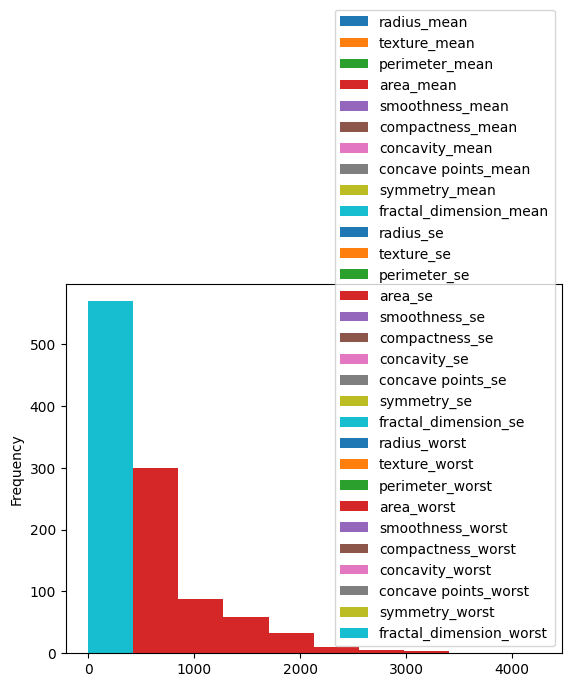

In [84]:
import matplotlib.pyplot as plt
myData.plot.hist()

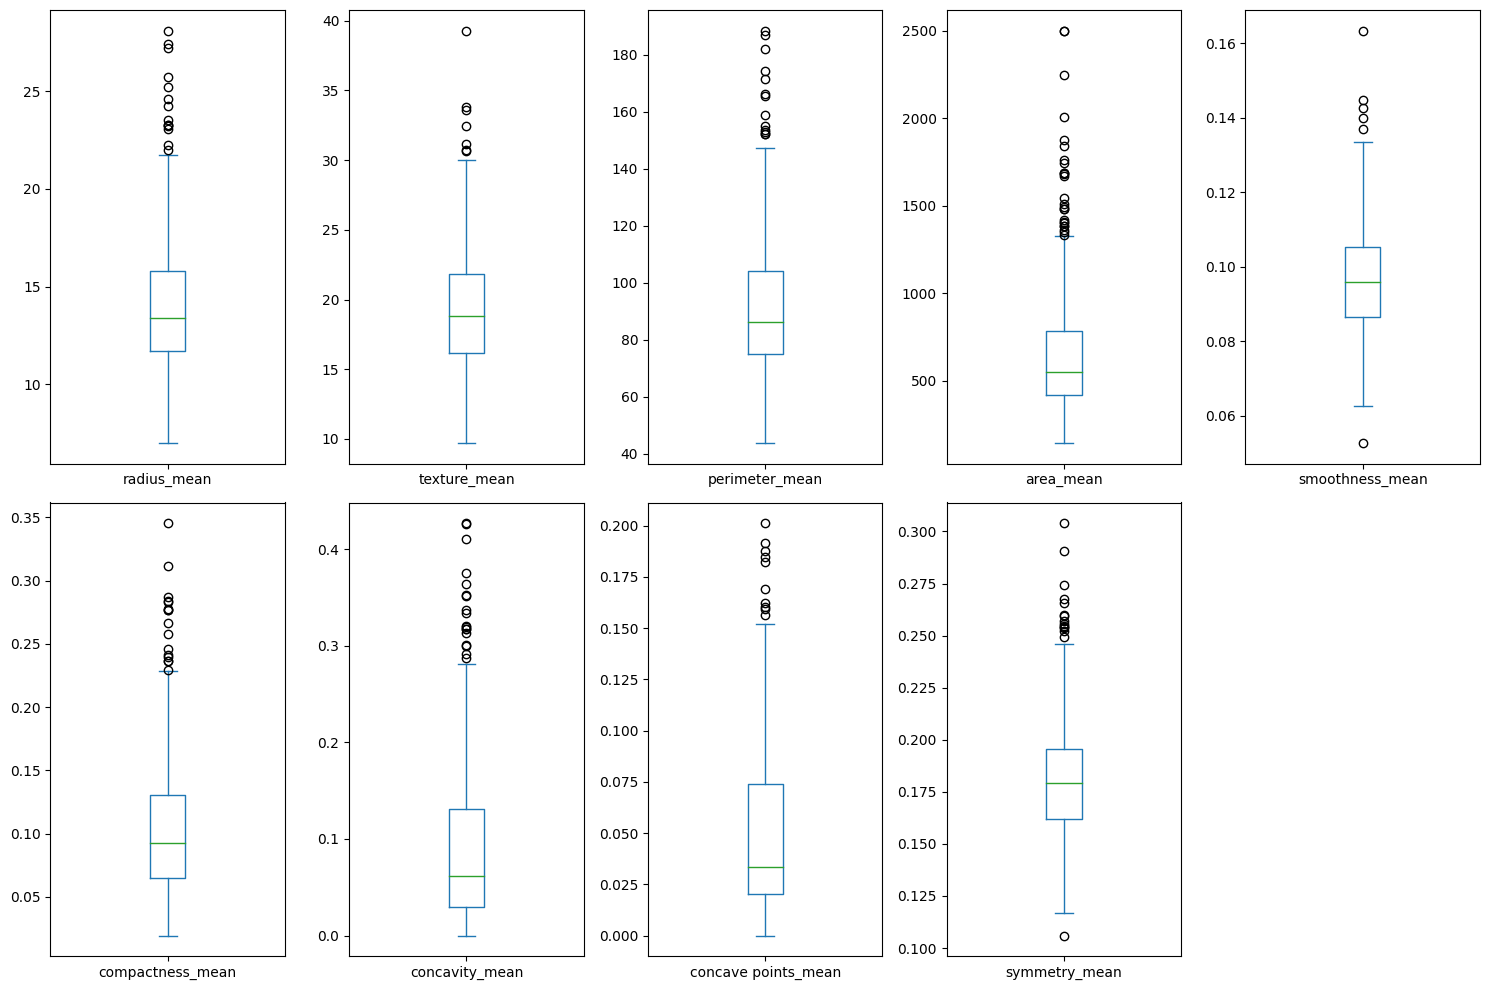

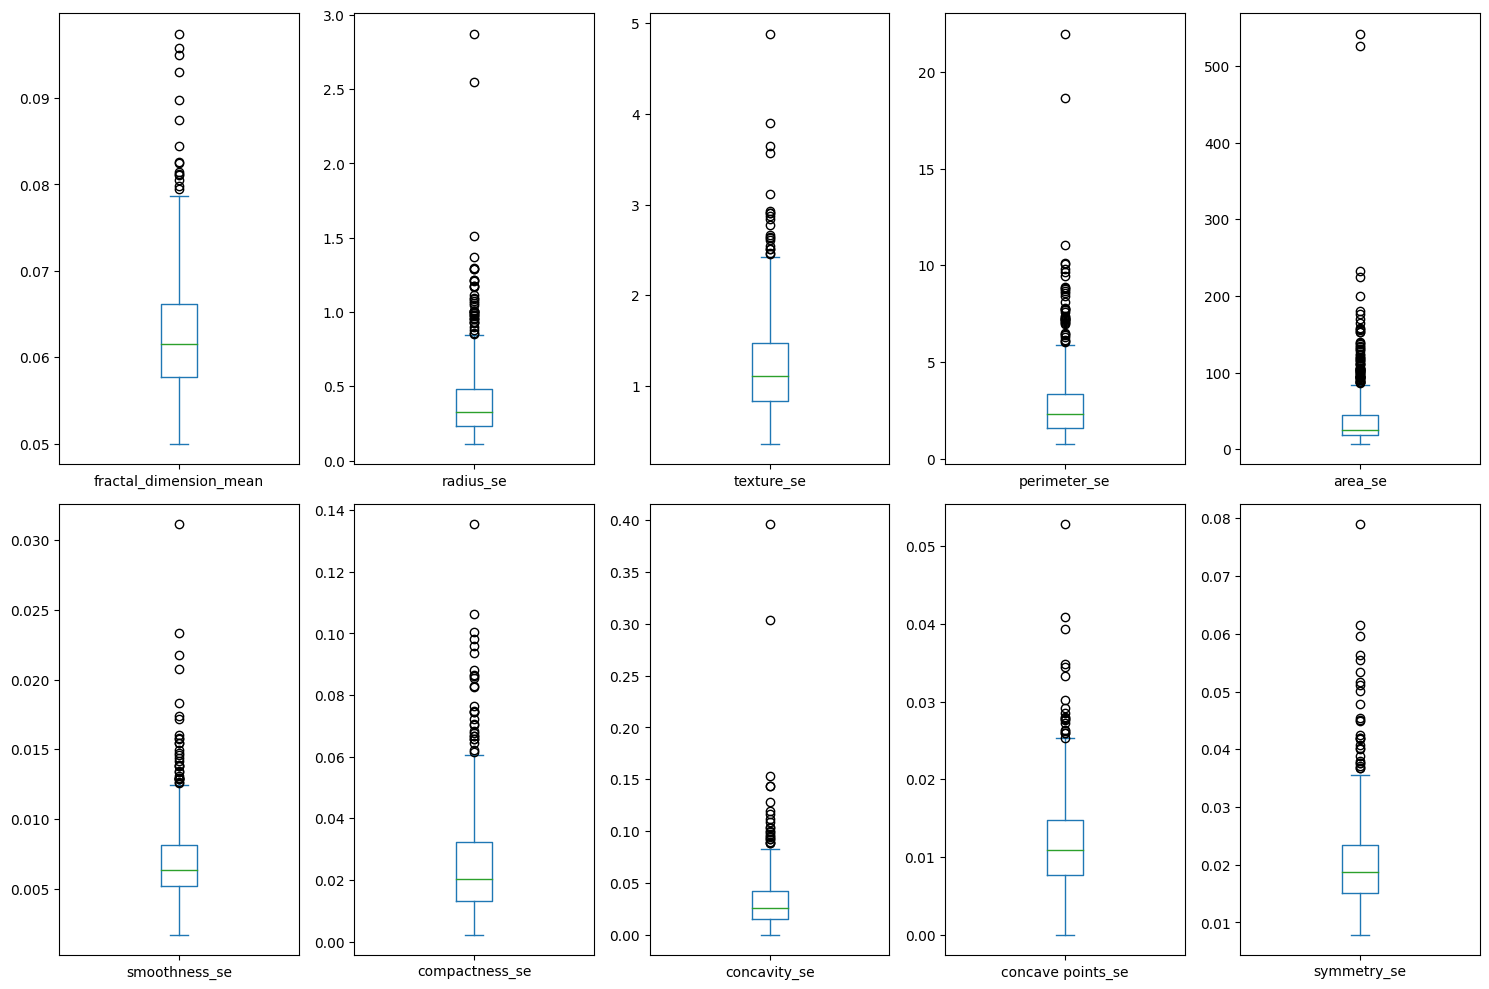

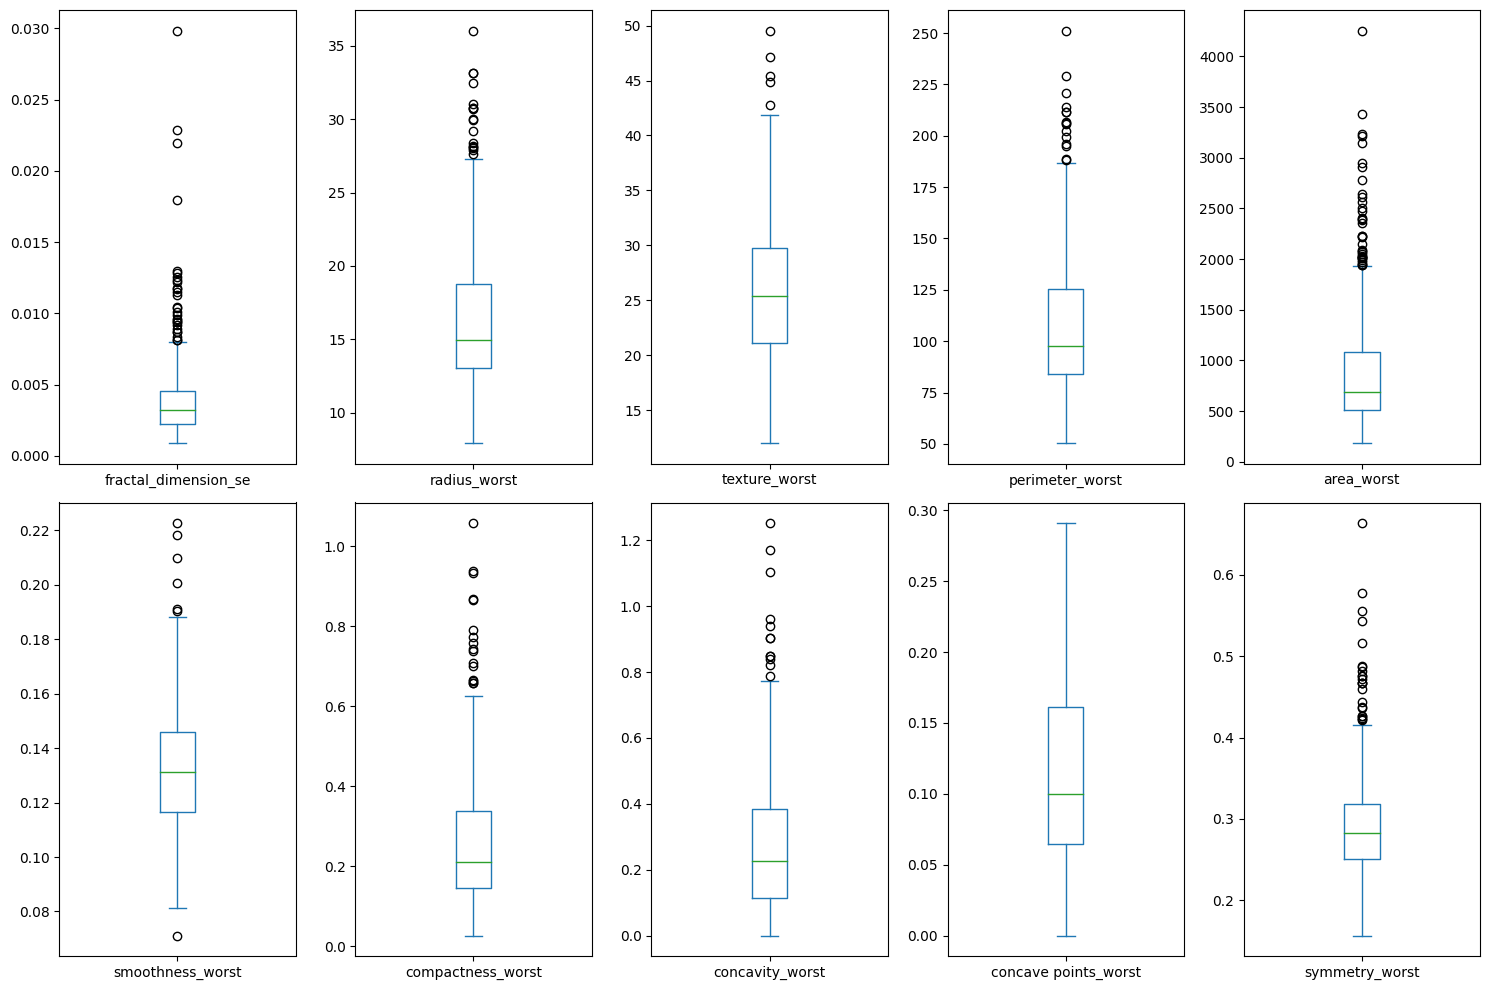

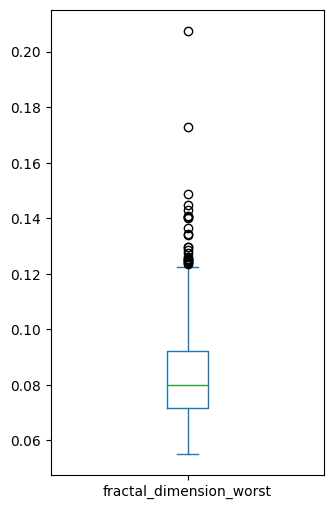

In [80]:
import matplotlib.pyplot as plt
num_columns = len(myData.columns)
cols_per_fig = 10

for i in range(0, num_columns, cols_per_fig):
    myData.iloc[:, i:i+cols_per_fig].plot(
        kind='box', 
        subplots=True, 
        layout=(2, 5),
        figsize=(15, 10),
        sharex=False,
        sharey=False
    )
    plt.tight_layout()
    plt.show()

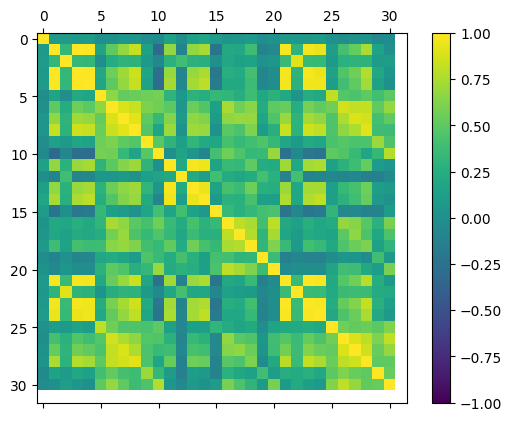

In [39]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111)
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [85]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['diagnosis']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [86]:
X = myData.drop('diagnosis', axis=1).values
Y = myData['diagnosis'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.289 0.203 0.289 0.16  0.495 0.33  0.107 0.155 0.458 0.382 0.027 0.086
  0.029 0.015 0.081 0.126 0.043 0.123 0.125 0.053 0.234 0.226 0.228 0.109
  0.396 0.243 0.151 0.25  0.319 0.176]
 [0.119 0.092 0.114 0.055 0.449 0.14  0.069 0.103 0.381 0.402 0.06  0.136
  0.054 0.017 0.268 0.091 0.05  0.269 0.174 0.072 0.082 0.097 0.073 0.032
  0.404 0.085 0.071 0.214 0.174 0.149]
 [0.396 0.154 0.406 0.238 0.494 0.595 0.487 0.485 0.738 0.429 0.119 0.077
  0.124 0.071 0.173 0.383 0.163 0.427 0.406 0.121 0.361 0.188 0.372 0.196
  0.448 0.551 0.504 0.822 0.611 0.291]
 [0.671 0.451 0.645 0.535 0.376 0.254 0.257 0.429 0.358 0.059 0.21  0.169
  0.167 0.163 0.102 0.078 0.043 0.197 0.041 0.038 0.756 0.628 0.685 0.597
  0.455 0.226 0.252 0.69  0.248 0.133]
 [0.458 0.395 0.458 0.323 0.537 0.387 0.357 0.456 0.472 0.281 0.252 0.12
  0.221 0.179 0.147 0.124 0.069 0.214 0.096 0.066 0.659 0.521 0.63  0.499
  0.722 0.321 0.375 0.72  0.404 0.266]]


In [87]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('diagnosis', axis=1).values
mydata_label = myData['diagnosis'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[1.580e-02 1.897e-02 1.034e-01 6.279e-01 1.298e-04 1.534e-04 5.516e-05
  3.756e-05 2.375e-04 8.225e-05 2.236e-04 9.029e-04 1.670e-03 1.772e-02
  4.947e-06 2.292e-05 2.050e-05 7.837e-06 2.026e-05 2.928e-06 1.751e-02
  2.474e-02 1.160e-01 7.614e-01 1.584e-04 3.352e-04 2.282e-04 8.795e-05
  3.845e-04 9.882e-05]
 [2.222e-02 2.909e-02 1.411e-01 6.404e-01 2.394e-04 1.518e-04 6.912e-05
  4.854e-05 4.244e-04 1.615e-04 6.484e-04 2.284e-03 4.464e-03 3.671e-02
  2.246e-05 3.348e-05 4.641e-05 3.323e-05 4.739e-05 6.940e-06 2.392e-02
  3.662e-02 1.523e-01 7.363e-01 3.096e-04 2.684e-04 2.073e-04 1.456e-04
  5.729e-04 1.817e-04]
 [1.258e-02 1.169e-02 8.404e-02 5.775e-01 8.797e-05 1.750e-04 1.703e-04
  7.999e-05 2.067e-04 5.765e-05 3.598e-04 5.818e-04 2.774e-03 3.682e-02
  5.566e-06 4.368e-05 5.285e-05 1.846e-05 3.011e-05 3.603e-06 1.482e-02
  1.564e-02 1.026e-01 8.042e-01 1.140e-04 4.882e-04 5.169e-04 1.962e-04
  3.826e-04 8.154e-05]
 [7.103e-03 7.734e-03 4.605e-02 4.713e-01 3.165e-05 3.430e-05 3.682

In [88]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]]


In [89]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('diagnosis', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('diagnosis', axis=1).values
mydata_label = myData['diagnosis'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[6.470e+02 1.181e+02 6.972e+02 5.731e+02 8.365e+01 3.132e+02 5.338e+02
 8.617e+02 6.953e+01 9.346e-02 2.688e+02 3.909e-02 2.539e+02 2.437e+02
 2.558e+00 5.325e+01 3.901e+01 1.133e+02 2.412e-02 3.468e+00 8.608e+02
 1.496e+02 8.979e+02 6.616e+02 1.225e+02 3.043e+02 4.367e+02 9.644e+02
 1.189e+02 6.644e+01]


In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False False False False False  True False  True False False
 False False False False False False False False False False False False
  True False False False False  True]
Feature Ranking: [18 25 19 27  2  8 13  1 11  1 12 22 15 24  4  5  7  3 14 17 16 21 23 26
  1 20  9 10  6  1]


In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.982 0.016 0.002]
[[ 5.086e-03  2.197e-03  3.508e-02  5.168e-01  4.237e-06  4.053e-05
   8.194e-05  4.778e-05  7.078e-06 -2.622e-06  3.137e-04 -6.510e-05
   2.236e-03  5.573e-02 -8.056e-07  5.519e-06  8.871e-06  3.279e-06
  -1.241e-06 -8.545e-08  7.155e-03  3.067e-03  4.946e-02  8.521e-01
   6.420e-06  1.013e-04  1.689e-04  7.367e-05  1.790e-05  1.614e-06]
 [ 9.287e-03 -2.882e-03  6.275e-02  8.518e-01 -1.482e-05 -2.689e-06
   7.514e-05  4.635e-05 -2.524e-05 -1.612e-05 -5.387e-05  3.484e-04
   8.196e-04  7.511e-03  1.494e-06  1.274e-05  2.869e-05  9.360e-06
   1.226e-05  2.897e-07 -5.687e-04 -1.322e-02 -1.860e-04 -5.197e-01
  -7.686e-05 -2.561e-04 -1.755e-04 -3.051e-05 -1.570e-04 -5.531e-05]
 [-1.234e-02 -6.355e-03 -7.167e-02 -2.789e-02  7.266e-05  1.018e-04
   2.660e-04  3.605e-05  1.413e-04  5.064e-05  6.062e-03  6.234e-03
   4.386e-02  9.902e-01  4.345e-05  1.277e-04  2.074e-04  4.789e-05
   1.144e-04  2.432e-05 -1.557e-02 -3.154e-02 -9.231e-02 -3.932e-02
  -4.2

In [92]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(569, 1)


In [93]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(569, 1)


In [94]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

myData['num'] = pd.cut(myData['diagnosis'], bins=3, labels=[0, 1, 2])
mydata_label = myData['diagnosis'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.065 0.025 0.048 0.06  0.009 0.026 0.051 0.082 0.008 0.006 0.036 0.005
 0.023 0.045 0.007 0.008 0.007 0.014 0.006 0.005 0.107 0.025 0.068 0.066
 0.021 0.024 0.045 0.077 0.019 0.012]
